In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores_full

from transformers import ViTModel

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../../_data/fig-symmetry-vision-transformers/full-models/DINO-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [3]:
path = ["encoder.layer[", "].attention.attention.query.weight", "].attention.attention.key.weight"]

'DINO small (5M parameters)'
dh = 64
patch = 8
l = 12
d = 384
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vits8')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINO-small-8'] = [l, d, h, dh, sym_scores]

'DeiT base (86M parameters)'
dh = 64
patch = 8
l = 12
d = 768
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vitb8')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINO-base-8'] = [l, d, h, dh, sym_scores]

'DINO small (5M parameters)'
dh = 64
patch = 16
l = 12
d = 384
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vits16')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINO-small-16'] = [l, d, h, dh, sym_scores]

'DeiT base (86M parameters)'
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = ViTModel.from_pretrained('facebook/dino-vitb16')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DINO-base-16'] = [l, d, h, dh, sym_scores]

'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vitb8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
S

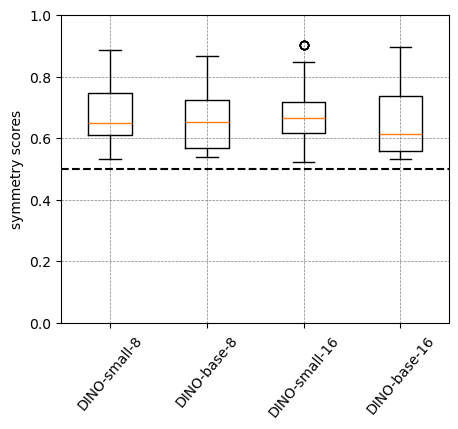

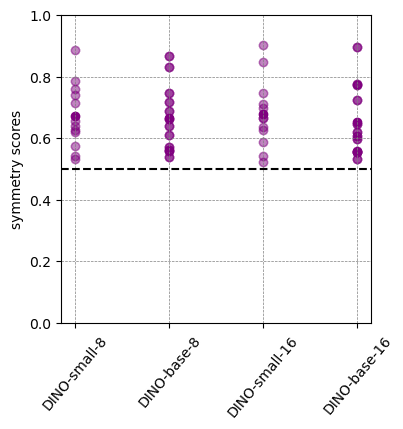

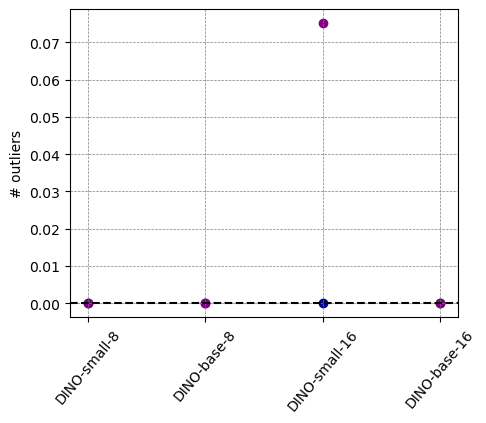

In [4]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)